**Part 0: What computers see an image**

5x5 Binary Image:
[[0 1 0 0 1]
 [1 1 1 1 1]
 [0 1 1 0 0]
 [1 1 1 0 0]
 [1 1 0 0 1]]


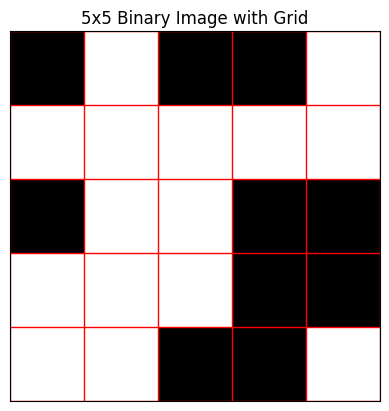

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 5x5 binary image (values 0 or 1)
binary_image = np.random.randint(0, 2, (5, 5), dtype=np.uint8)

# Print the binary image array
print("5x5 Binary Image:")
print(binary_image)

# Plot the image with a grid
fig, ax = plt.subplots()
ax.imshow(binary_image, cmap='gray', vmin=0, vmax=1)

# Set major ticks at the center of each cell
ax.set_xticks(np.arange(-0.5, 5, 1), minor=False)
ax.set_yticks(np.arange(-0.5, 5, 1), minor=False)

# Grid on those major ticks
ax.grid(which='major', color='red', linestyle='-', linewidth=1)

# Turn off axis labels/ticks
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='both', length=0)

plt.title("5x5 Binary Image with Grid")
plt.show()

**Part 1: Load and Display an Image**

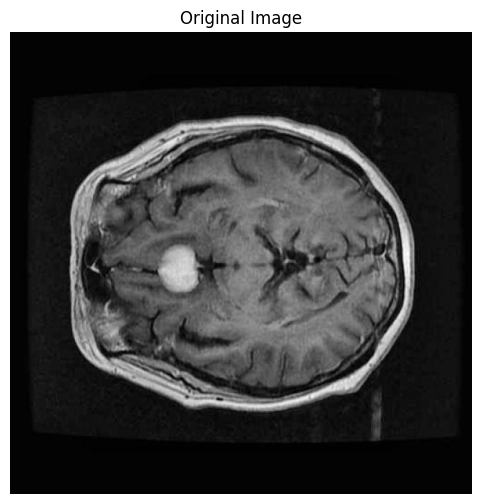

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to display an image using Matplotlib
def display_image(title, image, cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load an image
image_path = '/content/drive/MyDrive/Trainning/tumor-ex.jpg'  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found!")
else:
    # Convert BGR to RGB for Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    display_image("Original Image", image_rgb)

**Part 2: Convert to Grayscale**

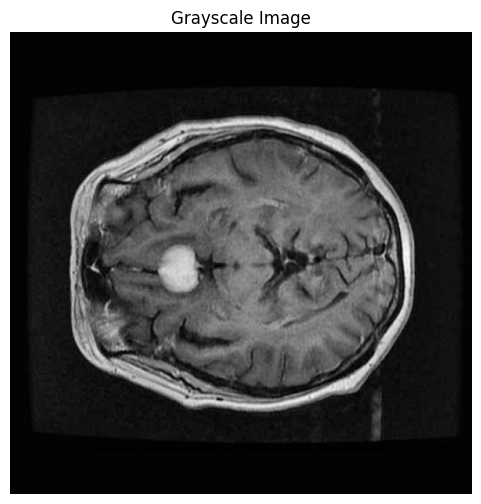

In [ ]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image("Grayscale Image", gray_image, cmap='gray')

**Part 3: Resize the Image**

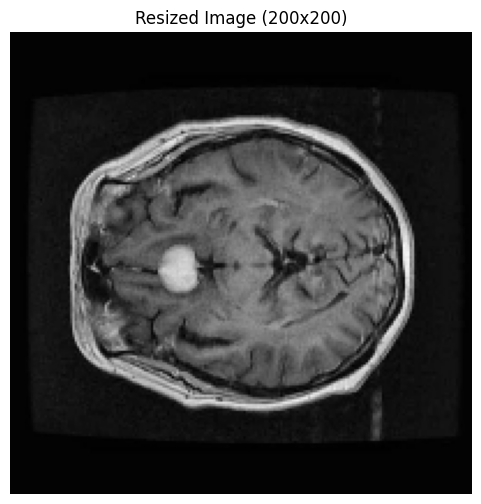

In [ ]:
# Resize the image to 200x200 pixels
resized_image = cv2.resize(image, (200, 200))
display_image("Resized Image (200x200)", resized_image)

**Part 4: Image Blurring**

- Gaussian Blur

Gaussian blur is an image processing technique used to reduce noise and detail by applying a smoothing effect to an image. It works by averaging the pixels around a target pixel using a weighted kernel, where the weights are determined by the Gaussian (bell-shaped) function. This means that pixels closer to the center have a higher influence than those farther away, resulting in a natural-looking blur that mimics the way a camera lens or human eye might blur an image out of focus. Gaussian blur is commonly used in graphics software for effects like softening edges, removing noise, or preparing images for edge detection algorithms.

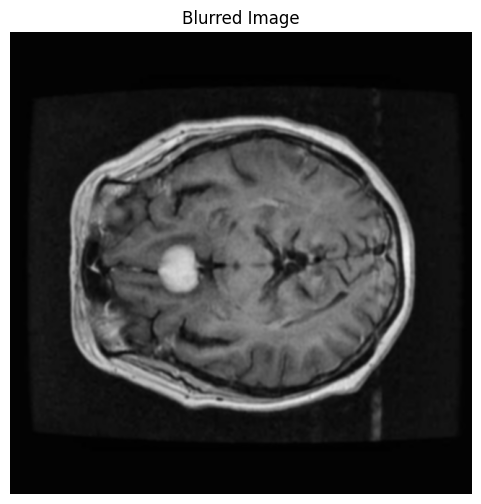

In [ ]:
# Apply Gaussian blur with a 15x15 kernel
blurred_image = cv2.GaussianBlur(image_rgb, (7, 7), 0)
display_image("Blurred Image", blurred_image)

- Usecase
  - Removes high-frequency noise in an image, making it suitable for   pre-processing steps in edge detection or image segmentation tasks.

- Pros
  - Smooths an image while preserving the overall structure better than simple
   averaging.

- Cons
  - Unlike more advanced techniques like bilateral filtering, Gaussian blur    does not differentiate between noise and edges, causing edge degradation.

- Median Blur

Median Blur is a noise-reduction technique that replaces each pixel's value with the median value of the surrounding pixels in a specified window. Unlike Gaussian blur, which averages pixel values and can blur edges, median blur preserves edges while effectively removing "salt-and-pepper" noise (random white and black dots). It's especially useful in scenarios where noise is sparse but sharp.

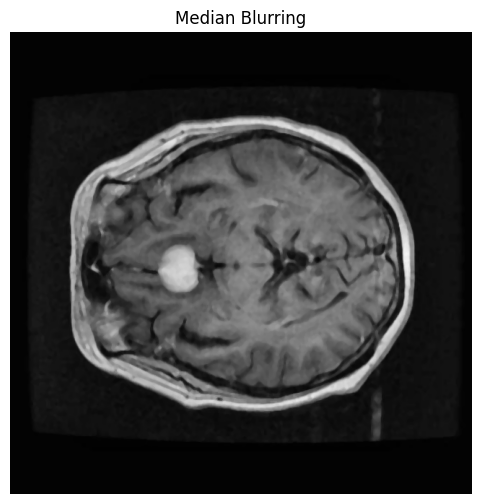

In [ ]:
median_blurred = cv2.medianBlur(image, ksize=5)  # Kernel size must be odd
display_image("Median Blurring", median_blurred, cmap='gray')

- Use Cases:
  - Excellent for images with impulse noise (salt-and-pepper noise).
  - Maintains edge sharpness better than Gaussian or average blurring.
- Pros:
  - Removes noise effectively without blurring edges.
- Cons:
  - Computationally more expensive than simple averaging or Gaussian blur.

**Part 5: Edge Detection**

**Canny Edge Detection** is a multi-stage algorithm used in image processing to identify and highlight the boundaries (edges) of objects within an image. It's known for its ability to produce clean, thin, and well-localized edges while minimizing false positives.

1. Noise Reduction (Gaussian Smoothing): The image is first smoothed using a Gaussian filter to reduce noise, as noise can lead to false edge detections.

2. Gradient Calculation: The gradient magnitude (edge strength) and direction are calculated for each pixel. This highlights areas with significant intensity changes.

3. Non-Maximum Suppression: This step thins the edges. For each pixel, it checks if its gradient magnitude is a local maximum along the gradient direction. If not, the pixel is suppressed (its value is set to zero), ensuring that only the strongest response for each edge is kept, resulting in thin edges.

4. Double Thresholding: Two thresholds, a high and a low, are applied. Pixels with gradient magnitudes above the high threshold are immediately classified as strong edges. Pixels below the low threshold are discarded. Pixels between the two thresholds are classified as "weak" edges.

5. Edge Tracking by Hysteresis: This final step connects the weak edges to the strong edges. If a weak edge pixel is connected to a strong edge pixel (directly or through other weak edges that are themselves connected to strong edges), it is also considered a valid edge. This helps to form continuous edge contours and prevents edge fragmentation due to noise.

In [ ]:
import numpy as np

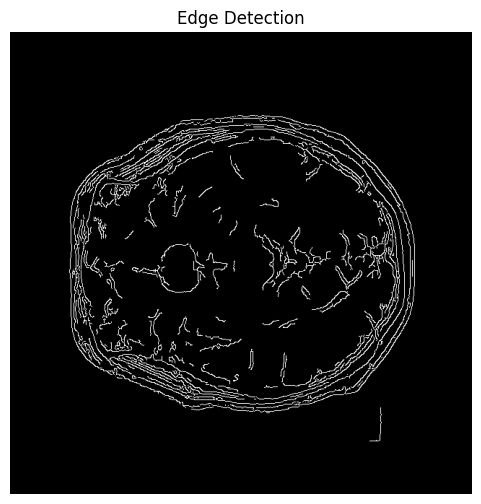

In [ ]:
# Perform edge detection using the Canny algorithm
edges = cv2.Canny(gray_image, 100, 200)
display_image("Edge Detection", edges, cmap='gray')

Pros:

1. Robustness: Includes noise reduction using Gaussian filtering, making it  
   less sensitive to noise.
2. Multi-stage Algorithm: Combines gradient calculation, non-maximum
   suppression, and hysteresis thresholding for precise edge detection.
3. Fine Edge Detection: Can detect fine and weak edges effectively.
4. Adjustable Sensitivity: Parameters (e.g., thresholds) allow for tuning to
   detect edges of varying prominence.

Cons:

1. Computationally Expensive: More resource-intensive compared to Sobel or
   Laplacian due to its multi-stage process.
2. Parameter Tuning Required: Thresholds must be carefully chosen to balance
   edge detection sensitivity and false positive rates.
3. Noisy Outputs with Improper Tuning: Poor parameter selection can lead to
   over-detection or missing edges.

**Sobel Edge Detection** is a widely used edge detection technique that primarily relies on calculating the image gradient. It's simpler and computationally less intensive than Canny, making it suitable for simple applications where less noise is present.

1. Grayscale Conversion (Optional but Recommended): While not strictly a part of the Sobel operator itself, images are typically converted to grayscale first, as edge detection usually works on intensity changes rather than color channels.

2. Gradient Approximation (Convolution with Kernels): The core of Sobel involves convolving the image with two 3x3 kernels (or filters)

3. Magnitude: For each pixel, the horizontal (Gx) and vertical (Gy) gradient components are combined to calculate the overall gradient magnitude, often using the Euclidean distance

4. Thresholding: A threshold is applied to the gradient magnitude. Pixels with a magnitude above the threshold are considered edge pixels, while those below are not. This step helps to distinguish between actual edges and minor intensity variations.

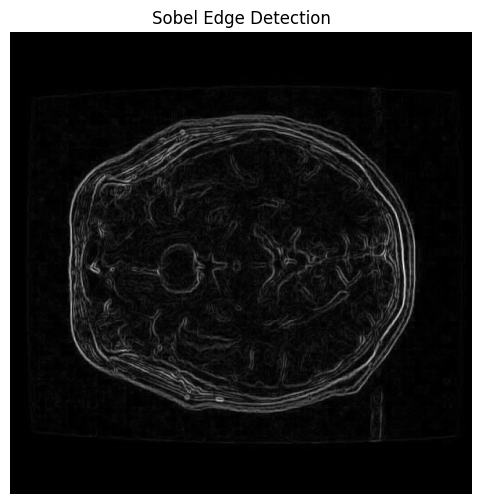

In [ ]:
# Sobel Edge Detection
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x-direction
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y-direction
sobel_combined = cv2.magnitude(sobelx, sobely)  # Magnitude of gradient
display_image("Sobel Edge Detection", sobel_combined, cmap='gray')

Pros:

1. Directional Sensitivity: Detects edges in specific directions (horizontal,
   vertical, or both), making it useful for understanding gradient orientation.
2. Simple and Fast: Computationally efficient and easy to implement.
3. Smoothing Effect: Includes a built-in smoothing step to reduce noise
  sensitivity.

Cons:

1. Noise Sensitivity: Although it smooths the image, it can still be sensitive
   to significant noise.
2. Weaker Edge Detection: May not perform well in detecting thin or weak edges
   compared to more advanced methods.
3. No Multi-scale Detection: Does not detect edges at different scales,  
   limiting its ability to capture fine details.

**Part 6: Image Thresholding**

**Simple Thresholding** is a global, pixel-wise operation used to convert a grayscale image into a binary image (black and white) by applying a single threshold value to all pixels.

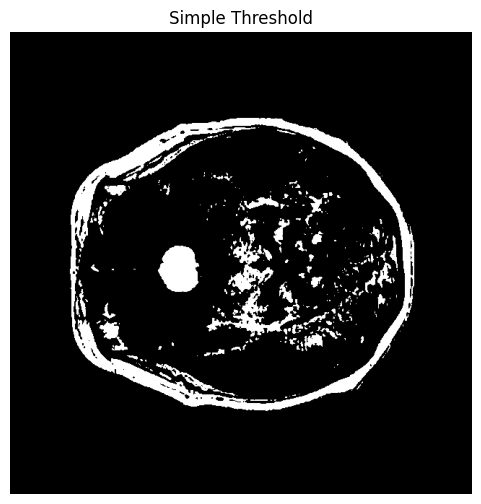

In [ ]:
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
display_image("Simple Threshold", binary_image, cmap='gray')

- Use Case:
  - Document Scanning: Simplify text or handwriting for OCR (Optical Character Recognition).
- Pros:
  - Fast and easy to implement.
  - Works well for images with distinct foreground and background.
- Cons:
  - Requires manual threshold value selection.
  - Fails for images with varying lighting or gradients.

**Adaptive Thresholding** calculates the threshold for each pixel based on the local neighborhood of that pixel rather than using a single global value. 

## 🔹 Adaptive Thresholding (Mean)

For a pixel at location \( (x, y) \):

$$
T(x, y) = \frac{1}{N} \sum_{(i, j) \in \text{block}} I(i, j) - C
$$

**Where:**
- \( N \) is the number of pixels in the block  
- \( I(i, j) \) is the intensity at pixel \( (i, j) \)  
- \( C \) is a constant subtracted from the mean

## 🔹 Adaptive Thresholding (Gaussian)

$$
T(x, y) = \sum_{(i, j) \in \text{block}} G(i, j) \cdot I(i, j) - C
$$

**Where:**
- \( G(i, j) \) is the Gaussian weight at position \( (i, j) \)  
- \( I(i, j) \) is the intensity at pixel \( (i, j) \)  
- \( C \) is a constant


## 🔹 Final Binarization Step

After calculating the threshold (either fixed or adaptive), the pixel is binarized as follows:

$$
\text{dst}(x, y) =
\begin{cases}
M, & \text{if } I(x, y) > T(x, y) \\
0, & \text{otherwise}
\end{cases}
$$

**Where:**
- \( I(x, y) \) is the pixel intensity at position \( (x, y) \)  
- \( T(x, y) \) is the threshold value (either global or local)  
- \( M \) is the maximum value to assign (e.g., 255)


In [2]:
adaptive_image = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

display_image("Adaptive Thresholding", adaptive_image, cmap='gray')

NameError: name 'cv2' is not defined

- Use Case:
  - Low-light Conditions: Segment handwritten notes or fingerprints under uneven lighting.
- Pros:
  - Handles varying illumination conditions effectively.
  - No need for a global threshold value.
- Cons:
  - Computationally expensive compared to simple thresholding.
  - May produce noisy results for very small regions.

**Part 7 : Image Enhancement**

- Histogram Equalization

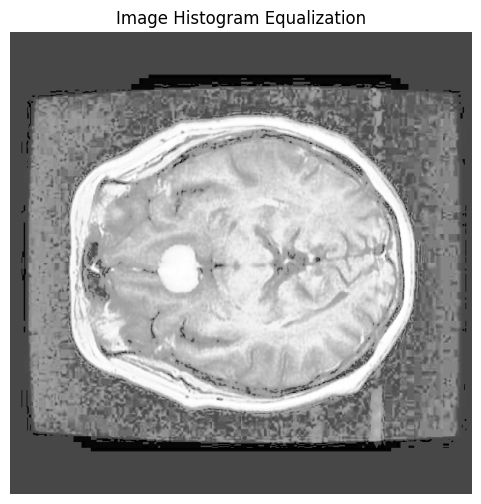

In [ ]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)
display_image("Image Histogram Equalization", equalized_image, cmap='gray')

- Use Case:
  - Low-contrast images: Commonly used in medical imaging (like X-rays) to enhance the visibility of structures and details in low-contrast images.
  - Satellite imagery: Enhances details in terrain or vegetation.
- Pros:
  - Improves global contrast: Makes the details in darker and lighter regions more visible.
  - Simple and fast: Easy to implement and computationally efficient.
  - Works well for monochromatic images: Effective for grayscale images or single-channel images.
- Cons:
  - Does not preserve local features: Might lead to over-enhancement in some areas, resulting in a loss of important local details.
  - Noise amplification: May amplify noise in the image if the original image has a lot of noise or is too uniform.
  - May not work well for images with a large portion of pixels already near the extremes of intensity.

- Contrast Limited Adaptive Histogram Equalization (CLAHE)

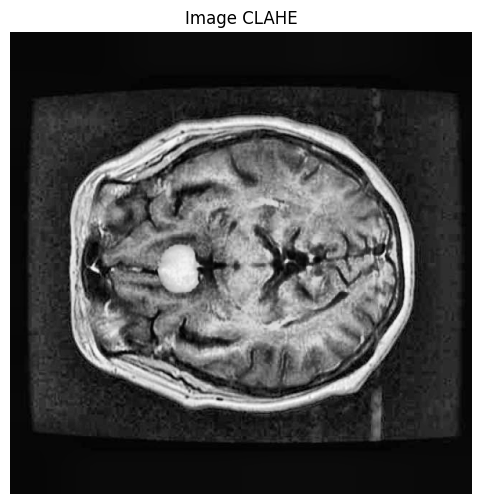

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE
clahe_image = clahe.apply(image)

display_image("Image CLAHE", clahe_image, cmap='gray')

- Use Case:
  - Medical images (CT scans, MRIs): Helps in visualizing features in images with varying intensity distributions.
  - Low-light images: Useful in enhancing details without amplifying noise in images captured under low-light conditions.
- Pros:
  - Preserves local details: Enhances the contrast in local regions without over-exposing others.
  - Reduces noise amplification: The contrast limiting prevents noise from being enhanced excessively.
  - Better for images with varying illumination: Useful in scenarios where lighting conditions change across the image.
- Cons:
  - Computationally more expensive: Requires more processing power than global histogram equalization.
  - Artifacts in homogenous regions: If the image has homogeneous regions, CLAHE may introduce artifacts like banding.
  - Not ideal for color images: Works best on grayscale images, and may need to be adapted for color images (by processing each channel separately).

## **Questions**

**1. What would it be like if we applied median blur to adaptive threshold image**

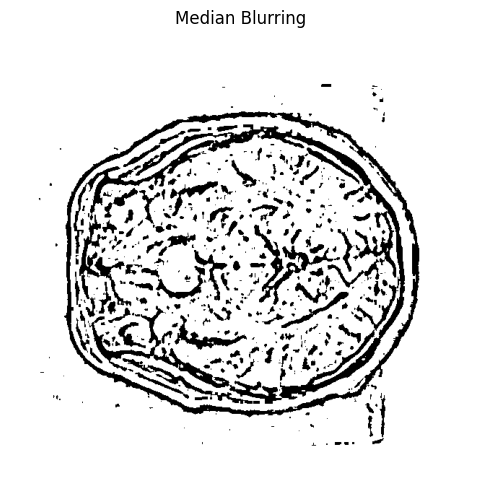

In [ ]:


resutl = cv2.medianBlur(adaptive_image, ksize=7)  # Kernel size must be odd
display_image("Median Blurring", resutl, cmap='gray')